In [1]:
import os
import torch
import pandas as pd
import torch.nn as nn
import numpy as np
from age_prediction.models.\
    efficientnet_pytorch_3d import EfficientNet3D as EfNetB0
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
%matplotlib inline

In [43]:
def MAE_pred(y_pred, y_true):
    mae = nn.L1Loss(reduction='mean')(y_pred, y_true).cpu().detach().numpy().item()
    return np.round(mae, 2)
def MSE_pred(y_pred, y_true):
    mse = nn.MSELoss()(y_pred, y_true).cpu().detach().numpy().item()
    return np.round(mse, 2)
def delta_pred(y_pred, y_true):
    delta = y_pred - y_true
    return np.mean(delta).round(2)

In [44]:
def ensemble(left, right):
    right = right[['Name', 'Pred']]
    ensemble = pd.merge(left, right, on=['Name'], suffixes=("_L", "_R"))
    ensemble['Pred'] = ensemble.apply(lambda x: (x['Pred_L']+x['Pred_R'])/2, axis=1)
    return ensemble

In [45]:
def metrics(preds):
    print("MAE", MAE_pred(torch.from_numpy(preds['Pred'].values), torch.from_numpy(preds['True'].values)))
    print("MSE", MSE_pred(torch.from_numpy(preds['Pred'].values), torch.from_numpy(preds['True'].values)))
    print("Delta", delta_pred(preds['Pred'], preds['True']))

In [46]:
def plot_regression(x, y):
    slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
    # intercept = 0
    # slope = 1
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x, label=line)
    ax.set_xlabel('Chronological age')
    ax.set_ylabel('Estimated age')
    ax.legend(facecolor='white')
    plt.show()

In [47]:
def plot_regression(dt, lim):
    dt = dt[['Name', 'True', 'Pred']]
    dt.columns = ['Image Filename', 'Chronological age', 'Estimated age']

    pearson = pg.corr(dt['Estimated age'], dt['Chronological age'])
    # display(pearson)

    sns.set(style='white', font_scale=1.2)
    g = sns.JointGrid(data=dt, x='Chronological age', y='Estimated age',
                    xlim=lim, ylim=lim, height=5)
    g.plot_joint(sns.regplot, color="xkcd:muted blue")
    g = g.plot_marginals(sns.histplot, color="xkcd:bluey grey")
    g.ax_joint.text(lim[0]+2, lim[1]-2, 'r = ' + str(pearson.r[0].round(2)) + ', p < .001', fontstyle='italic')
    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, '-r')
    plt.tight_layout()

In [48]:
def bias_corr(pred):
    a = 0.41
    b = 45.42
    return pd.Series((pred - b)/a)

Left
MAE 4.8
MSE 39.56
Delta 0.49
Right
MAE 4.24
MSE 33.76
Delta -0.04
Left+Right
MAE 3.87
MSE 25.11
Delta 0.23


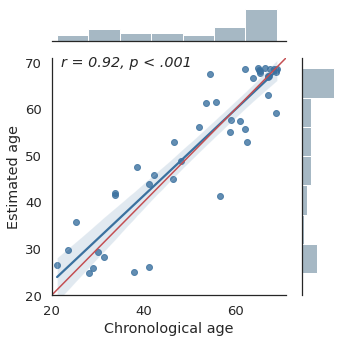

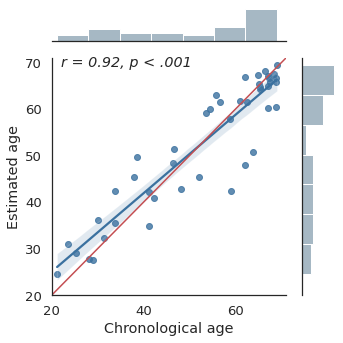

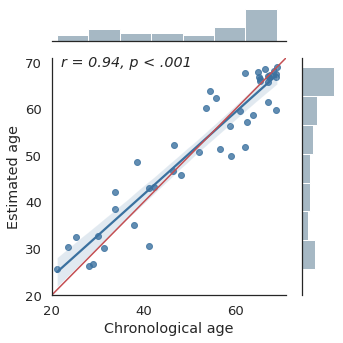

In [49]:
# Validation 0-70
val_L = pd.read_csv("predict_results/val_0-70_L.csv")
val_R = pd.read_csv("predict_results/val_0-70_R.csv")
ens = ensemble(val_L, val_R)
ens.to_csv('predict_results/val_0-70_LR.csv', index=False)
print("Left")
metrics(val_L)
plot_regression(val_L, (20,71))
print("Right")
metrics(val_R)
plot_regression(val_R, (20,71))
print("Left+Right")
metrics(ens)
plot_regression(ens, (20,71))

Left
MAE 4.8
MSE 54.37
Delta 0.83
Right
MAE 4.76
MSE 37.5
Delta -1.34
Left+Right
MAE 3.64
MSE 28.33
Delta -0.26


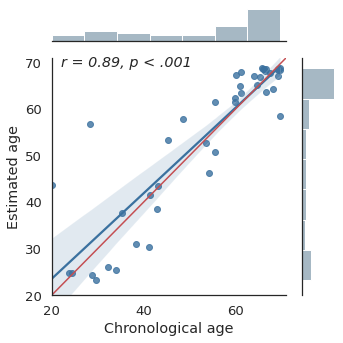

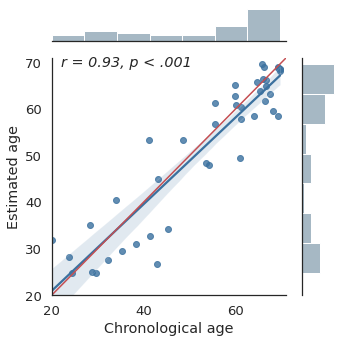

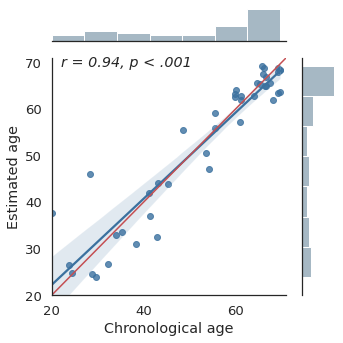

In [50]:
# Test 0-70
val_L = pd.read_csv("predict_results/test_0-70_L.csv")
val_R = pd.read_csv("predict_results/test_0-70_R.csv")
ens = ensemble(val_L, val_R)
ens.to_csv('predict_results/test_0-70_LR.csv', index=False)
print("Left")
metrics(val_L)
plot_regression(val_L, (20,71))
print("Right")
metrics(val_R)
plot_regression(val_R, (20,71))
print("Left+Right")
metrics(ens)
plot_regression(ens, (20,71))

Left
MAE 4.280558231788078
MSE 28.4084666241285
Delta 1.5427203774834435
Right
MAE 4.780182834437086
MSE 36.94254516904214
Delta 3.2049761589403967
Left+Right
MAE 4.236723837748344
MSE 27.7906831426447
Delta 2.37384826821192


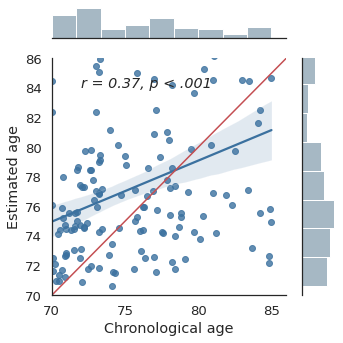

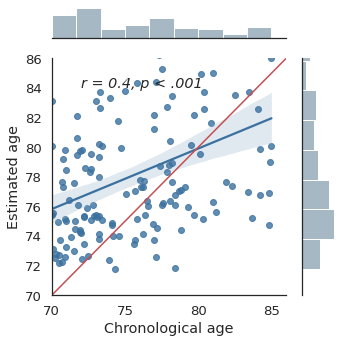

In [22]:
# Val 70-100
left = pd.read_csv("predict_results/val_70-100_L.csv")
right = pd.read_csv("predict_results/val_70-100_R.csv")
ens = ensemble(left, right)
ens.to_csv('predict_results/val_70-100_LR.csv', index=False)
print("Left")
metrics(left)
plot_regression(left, (70,86))
print("Right")
metrics(right)
# plot_regression(right, (70,86))
print("Left+Right")
metrics(ens)
plot_regression(ens, (70,86))

Left
MAE 3.8213887019867547
MSE 22.100973866603976
Delta 0.5262229006622523
Right
MAE 4.306676344370862
MSE 29.712228822943267
Delta 2.244819867549669
Left+Right
MAE 3.7840930529801327
MSE 21.63203746373164
Delta 1.3855213841059613


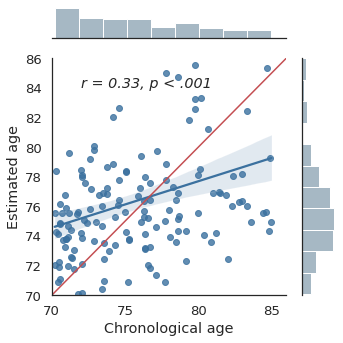

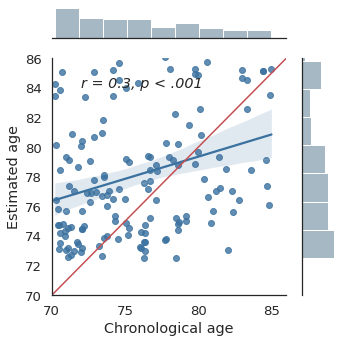

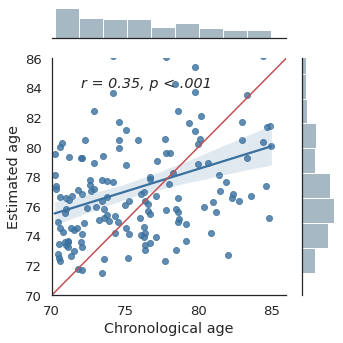

In [23]:
# Test 70-100
left = pd.read_csv("predict_results/test_70-100_L.csv")
right = pd.read_csv("predict_results/test_70-100_R.csv")
ens = ensemble(left, right)
ens.to_csv('predict_results/test_70-100_LR.csv', index=False)
print("Left")
metrics(left)
plot_regression(left, (70,86))
print("Right")
metrics(right)
plot_regression(right, (70,86))
print("Left+Right")
metrics(ens)
plot_regression(ens, (70,86))

Left
MAE 6.910618421052631
MSE 68.35870077566689
Delta 6.142161014354067
Right
MAE 7.617103325358851
MSE 80.87346662044726
Delta 6.9494314593301425
Left+Right
MAE 7.0593541220095695
MSE 69.51358779025865
Delta 6.545796236842104


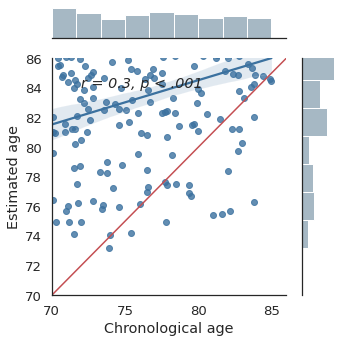

In [26]:
# AD
val_L = pd.read_csv("predict_results/ad_70-100_L.csv")
val_R = pd.read_csv("predict_results/ad_70-100_R.csv")
ens = ensemble(val_L, val_R)
ens.to_csv('predict_results/ad_70-100_LR.csv', index=False)
print("Left")
metrics(val_L)
# plot_regression(val_L, (70,86))
print("Right")
metrics(val_R)
# plot_regression(val_R, (70,86))
print("Left+Right")
metrics(ens)
plot_regression(ens, (70,86))

Left
MAE 4.365672023904383
MSE 29.61975322788687
Delta 1.8322337211155375
Right
MAE 4.832273565737053
MSE 34.984906372016
Delta 3.5294715099601586
Left+Right
MAE 4.438499950199203
MSE 29.556165527049863
Delta 2.6808526155378485


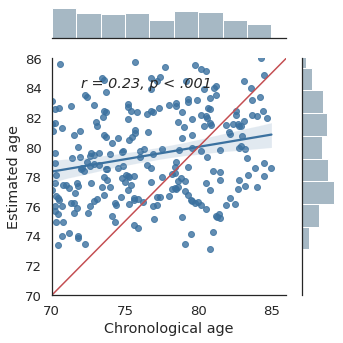

In [25]:
# MCI
val_L = pd.read_csv("predict_results/mci_70-100_L.csv")
val_R = pd.read_csv("predict_results/mci_70-100_R.csv")
ens = ensemble(val_L, val_R)
ens.to_csv('predict_results/mci_70-100_LR.csv', index=False)
print("Left")
metrics(val_L)
# plot_regression(val_L, (70,86))
print("Right")
metrics(val_R)
# plot_regression(val_R, (70,86))
print("Left+Right")
metrics(ens)
plot_regression(ens, (70,86))